# Importar datos

In [ ]:
# verificar sobre que directorio se está trabajando
getwd()

In [ ]:
# cambiar el directorio de trabajo
setwd("/Users/ppando/Materias/data/materias/exploracion-visualizacion/R")

In [ ]:
df <- read.table("usuarios_ecobici_2024.csv", sep = ",", header = TRUE)
head(df)

In [7]:
# otra forma
df <- read.csv("usuarios_ecobici_2024.csv",sep = ",") 
head(df)

,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
,<int>,<chr>,<int>,<chr>,<chr>
1,1094487,OTHER,35,2024-01-18,09:21:02
2,1097128,FEMALE,21,2024-01-21,23:02:26
3,1102901,OTHER,19,2024-01-29,19:33:32
4,1096100,FEMALE,29,2024-01-20,18:57:05
5,1103049,MALE,21,2024-01-30,00:49:33
6,1103476,FEMALE,18,2024-01-30,21:24:11


In [8]:
# cargamos la librería, instalarla desde Packages
library(openxlsx) 
df <- read.xlsx("usuarios_ecobici_2024.xlsx")
head(df)

,ID_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta,Customer.Has.Dni..Yes...No.
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1224742,FEMALE,24,45573,0.5236690,No
2,1224990,MALE,18,45573,0.7905903,No
3,1225021,MALE,30,45573,0.8301157,No
4,1224773,OTHER,23,45573,0.5590394,No
5,1225009,MALE,21,45573,0.8084375,No
6,1224886,MALE,27,45573,0.6719907,No


In [ ]:
View(df)

# Exportar datos

In [ ]:
# separados por coma
write.csv(x = df, file = "xxx.csv")

# separados por punto y coma
write.csv2(x = df, file = "xxx.csv")

write.xlsx(x = df, file = "xxx.xlsx", rowNames = FALSE)

## Ejercicios

Descargar de la página correspondiente e importar la base de datos ecobicis

In [9]:
setwd("/Users/ppando/Materias/data/materias/exploracion-visualizacion/R")
df <- read.table("usuarios_ecobici_2024.csv", sep = ",", header = TRUE)
head(df)

,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
,<int>,<chr>,<int>,<chr>,<chr>
1,1094487,OTHER,35,2024-01-18,09:21:02
2,1097128,FEMALE,21,2024-01-21,23:02:26
3,1102901,OTHER,19,2024-01-29,19:33:32
4,1096100,FEMALE,29,2024-01-20,18:57:05
5,1103049,MALE,21,2024-01-30,00:49:33
6,1103476,FEMALE,18,2024-01-30,21:24:11


Leer los nombres de las columnas de la base

In [10]:
x <- names(df)
x

[1] "id_usuario"     "genero_usuario" "edad_usuario"   "fecha_alta"    
[5] "hora_alta"

¿Cuántos años tiene la mujer de mayor edad?

In [11]:
df_females <- subset(df, genero_usuario=='FEMALE') 
x <- max(df_females$edad_usuario)
x

[1] 2016

¿Cuál es la edad más frecuente de los hombres?

In [12]:
# Se filtró por edad_usuario menor a 100
df_male <- subset(df, genero_usuario=='MALE' & edad_usuario < 100) 
frecuencias <- table(df_male$edad_usuario)
x <- as.numeric(names(frecuencias)[which.max(frecuencias)])
x

[1] 18

Gráfico de frecuencia

In [14]:
library(ggplot2)

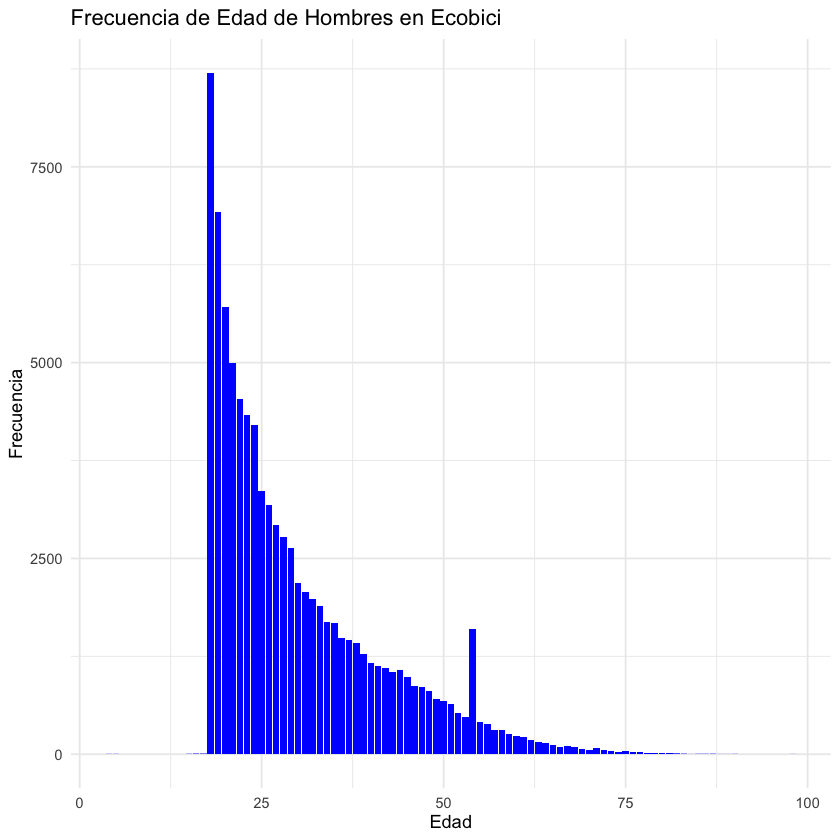

In [15]:
ggplot(df_male, aes(x = edad_usuario)) +
  geom_bar(stat = "count", fill = "blue") +
  labs(title = "Frecuencia de Edad de Hombres en Ecobici", 
        x = "Edad", 
        y = "Frecuencia") +
  theme_minimal()

Segmentar la base con las mujeres que tienen una edad mayor a 40 y guardarla en un archivo .csv

In [16]:
df_female_mas_40 <- subset(df, genero_usuario=='FEMALE' & edad_usuario > 40)
write.csv2(x = df_female_mas_40, file = "df_female_mas_40.csv")

Guardar los datos de cada categoría de la variable "genero_usuario" en distintos dataframes y exportarlos a distintas hojas del Excel

In [17]:
library(openxlsx)

In [18]:
df_fem = subset(df, genero_usuario=='FEMALE')
df_mal = subset(df, genero_usuario=='MALE')
df_other = subset(df, genero_usuario=='OTHER')
lista_exportar <- list("df_mal" = df_mal, "df_fem" = df_fem, "df_other" = df_other)
write.xlsx(x = lista_exportar, file = "base_dividida.xlsx", rowNames = FALSE)